## Predicting Movies' Success
### Group Members:

Mark Chang A14652371

Jason Lu A15679721

Katherine Liang A13738070

Rachel Dovsky A14021838

Stacey Chin A14493800


## Overview
With the ever increasing amount of movies coming out each year, the film industry is now more lucrative than ever before. This raises the pressure for industry partners to produce the most successful film while mitigating the risks involved. Our goal is to take a data science approach to figuring out what makes a successful movie and how we can use this information to predict future movie releases, for industry partners and fans alike. We want to see what trends may emerge, how economic constraints may impact movie quality, and what correlations can be found between qualitative data, quantitative data, and a movie’s likeliness to succeed.

## Research Question
How likely is a movie to be successful given its budget, genre, year of release, and runtime? We want to predict the success of movies in terms of their revenue and vote average, given the variables mentioned earlier.

## Background and Prior Resesarch
Generally, movies from bigger, more established production companies like Walt Disney, Warner Brothers, and 20th Century Fox are more successful and they typically have higher budgets. According to The Numbers, which provides movie financial analysis, the average production budgets of each company are $71,790,338, $56,101,746, and $50,801,480 respectively. Recently, thriller and high action movies have attracted the biggest audience, whereas a decade ago, romantic comedies would have been considered the most popular. In an infographic by No Film School, thriller and action movies represented roughly 30% of the movies released in 2010. On the other hand, in 1950, thriller and action only represented 10% while romance, comedy, and western were the leading genres. Through our project, we wanted to explore other factors that would potentially affect the success of a movie. 
A similar project that was done in 2018 analyzed how winning awards correlate with the general public’s opinion of movies, and how the genre and revenue affect the popularity of a movie. This project is similar to ours in that they analyzed how genre and revenue contribute to the success of the movie, which they measured as positive feedback. They found that there was a high correlation between award winning movies and public reviews on IMDb and action movies with higher revenues generally won high scores. We expanded upon this by looking at more factors that could lead to better ratings. 


References (include links):
1)https://github.com/COGS108/FinalProjects-Wi18/blob/master/088-FinalProject.ipynb
2)https://m.the-numbers.com/movies/#tab=theatrical_distributor
3)https://nofilmschool.com/Film-Genre-Popularity-Infographic

## Hypothesis
We hypothesize that the bigger the budget, the more successful a movie will be. We think genre is also an important factor, but that it may be correlated with budget, since certain genres, like action and fantasy, generally require bigger budgets.

## Dataset
The dataset we examine is titled “The Movies Dataset” by Kaggle user Rounak Banik. This dataset includes data for 45,000 movies released on or before July 2017 from the MovieLens dataset including 24 columns of attribute for each film before cleanup. These ratings are aggregated from 27 million reviews from the GroupLens website; GroupLens is a research lab at the University of Minnesota which created MovieLens as a resource for data exploration and recommendation of movies

Dataset Name: The Movies Dataset 

Number of observations: 45,000

Link to the dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset?fbclid=IwAR1Gfe6pPzsw

## Setup
We will be installing the cpi python library to the local machine. We will use the functions included in this package to convert all monetary values to a standardized amount to account for annual inflation. The other packages that we import will not alter the local machine, and includes: numpy, pandas, matplotlib.pyplot, seaborn, re, StringIO from io, patsy, statsmodels.api, and scipy.stats.

## Data Cleaning		
						
The dataset that we are using is currently oversaturated with information. We will not be using all of the observations provided for us, since most of these columns are irrelevant to answering our research question. We will drop those columns all together, as well as some of the rows with incomplete data. 

The columns that we drop are: adult, belongs_to_collection, homepage, id, imdb_id, original_language, original_title, overview, popularity, poster_path, production_companies, production_countries, spoken_languages, status, tagline, video, and vote_count. 

This leaves us with 7 columns: budget, genres, release_date, revenue, runtime, title, and vote_average.

With the budget and revenue column, we decided to drop all observations that were either missing values or contained values less than $1 Million. Our group unanimously agreed that in order to qualify as a successful film, independent films with a smaller budget are unlikely to have mainstream appeal, with exceptions being rare outliers. In addition, films that gross less than this value are unsuccessful according to our narrow definition, regardless of how they score in rating. After that, we use cpi to adjust for inflation, setting the revenue and budget columns to their corresponding dollar value in 2018. The final values in budget and revenue range from 1 million to 2.8 billion, so in order to fit this information into our histogram model, we will be using a log 10 transformation.

The release date values are normalized to ”Year Month Day” format for our own convenience for later calculations. This allows us the ability to sort the dataset chronologically. This change will be kept until the very end and will not affect our results in any way.

We clean up the vote average values by converting them into numeric and dropping all missing observations here as well. 

In the runtime column, we just drop the missing observations. Since the runtime column already standardizes its values to “minutes”, we confirmed that all the values are correct and moved onward.

Since each individual movie can have up to 3 genre tags, we decide to drop all but the main genre from each film and replace the column with the simplified value. Each movie is now only associated with its main genre, which enhances the accuracy of genre trends throughout time. This removes ambiguity, such as when a film is mildly funny and features a comedy tag, when the intent of the film is not for comedy.

After dropping all of the unnecessary observations, our final dataframe contains 4622 rows and 9 columns, counting the adjusted revenue and adjusted budget. We split this dataset into 2 more groups, one for measuring and the other for testing. The measuring data frame has 3241 rows and 9 columns. The testing data frame has 1378 rows and 9 columns. After cleaning all of the data, the concluding data frames each contain above 1000 observations. In terms of “cleanliness”, we tried our best to remove all observations that we thought would either interfere or be irrelevant for answering our hypothesis. We created artificial bounds to remove clusters of outliers, while keeping all other outliers that exist in our data set for the most accurate results.


## Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import cpi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from io import StringIO

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from scipy.stats import pearsonr, norm, ttest_ind

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Getting the data
First, we need to import the data we will be using, which is a publicly-available csv file from Kaggle. The specific link to it is here: https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7#movies_metadata.csv 
We will import the file as a dataframe which we can easily manipulate and analyze.

This dataset comes with many variables about each movie, like the spoken language, IMDB ID, and a plot overview. We wanted to focus mostly on quantifiable variables and those that we think are important in predicting a movie's success, like budget, runtime, and genre. We want to keep revenue and vote average as the outcomes to see how they are affected by the three predictive variables. We also want to keep the years of when the movies were released to see the trends of our variables over time and movie titles so we can identify any interesting samples. All other columns of data will be dropped so that our dataframe contains only relevant data.


In [2]:
# New Dataframe. Make sure to import the movies_metatdata.csv file from
# https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7#movies_metadata.csv
df = pd.read_csv("movies_metadata.csv", dtype=object)

In [3]:
# Dropping columns except for: budget, genres, release_date, revenue, runtime, title, vote_average
# Dropped: vote_count, video, tagline, status, spoken_languages, production_countries, 
#          production_companies, poster_path, popularity, overview, original)title, 
#          original_language, imdb_id, id, homepage, belongs_to_collection, adult
df = df.drop(['vote_count'], axis = 1)
df = df.drop(['video'], axis = 1)
df = df.drop(['tagline'], axis = 1)
df = df.drop(['status'], axis = 1)
df = df.drop(['spoken_languages'], axis = 1)
df = df.drop(['production_countries'], axis = 1)
df = df.drop(['production_companies'], axis = 1)
df = df.drop(['poster_path'], axis = 1)
df = df.drop(['popularity'], axis = 1)
df = df.drop(['overview'], axis = 1)
df = df.drop(['original_title'], axis = 1)
df = df.drop(['original_language'], axis = 1)
df = df.drop(['imdb_id'], axis = 1)
df = df.drop(['id'], axis = 1)
df = df.drop(['homepage'], axis = 1)
df = df.drop(['belongs_to_collection'], axis = 1)
df = df.drop(['adult'], axis = 1)

In [4]:
# Checking for: budget, genres, release_date, revenue, runtime, title, vote_average
print(df.columns.values)

print('original shape: ', df.shape)

['budget' 'genres' 'release_date' 'revenue' 'runtime' 'title'
 'vote_average']
original shape:  (45466, 7)


## Data cleaning - part 1
The cell directly below tells us that our dataframe has some empty values in the release date, revenue, runtime, title, and vote average columns. We want to remove movies that have any empty values, since we already restricted our dataframe to only contain variables that are important to us. Therefore, we need to have each variable for the movies we want to analyze.


In [5]:
nan = df.isnull().sum()
print(nan)

budget            0
genres            0
release_date     87
revenue           6
runtime         263
title             6
vote_average      6
dtype: int64


In [6]:
# Removing films with unlisted budget
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df = df.dropna(subset = ['budget'])

# Removing films with budget less than $1 Million
df['budget'] = df['budget'].astype(int)
df = df[df['budget']>=1000000]

print('after budget clean: ', df.shape)

after budget clean:  (7405, 7)


In [7]:
# Removing films with unlisted revenue
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df = df.dropna(subset = ['revenue'])

# Removing films with revenue less than $1 Million
df['revenue'] = df['revenue'].astype(int)
df = df[df['revenue']>=1000000]

print('after revenue clean: ', df.shape)

after revenue clean:  (4637, 7)


After removing movies with empty values, the dataframe is now completely full without any missing values.

In [8]:
nan = df.isnull().sum()
print(nan)

budget          0
genres          0
release_date    0
revenue         0
runtime         0
title           0
vote_average    0
dtype: int64


## Data cleaning - part 2
We want to convert the given date strings to a numerical format that is easier to manipulate to later display our graphs and use in analysis.

In [9]:
# Convert date to Year Month Day... YYYY MM DD
df["release_date"] = pd.to_datetime(df["release_date"]).dt.strftime("%Y%m%d")

# Fixing values of vote_average
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df = df.dropna(subset = ['vote_average'])

# Removing films with missing runtime
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df = df[df['runtime']>=1]
# 4630 rows x 7 columns

print('after runtime clean: ', df.shape)

after runtime clean:  (4630, 7)


## Data cleaning - part 3
We want to adjust each movie's budget and revenue for inflation so that we can compare the variables fairly over time, for what the money would be worth today. The cpi library allows us to adjust the given amount using the Consumer Price Index (cpi) with 2018 as the base year. We got this information and part of the code from the public github repo: https://github.com/datadesk/cpi

In [10]:
# adjusting revenue and budget for inflation to 2018 as base year (latest year in cpi data)

for index, row in df.iterrows():
    year = int(str(row["release_date"])[:4])
    df.loc[index, "adjusted_revenue"] = cpi.inflate(row["revenue"], year)
    
for index, row in df.iterrows():
    year = int(str(row["release_date"])[:4])
    df.loc[index, "adjusted_budget"] = cpi.inflate(row["budget"], year) 

## Descriptive Data

In [11]:
# Replacing genres tag with numerical values
value = ''
for a in df['genres']: 
    value = re.sub('[^0-9]+',' ', a)
    df['genres'] = df['genres'].replace(a, value)
value = 'genre'
for a in df['genres']: 
    value += re.sub(' ','\n', a)
value = StringIO(value)
ndf = pd.read_csv(value, sep=" ")
ndf['genre_tags'] = ndf['genre'].value_counts()
ndf = ndf.dropna(subset = ['genre_tags'])
ndf = ndf.drop(['genre'], axis = 1)

# Setting up genre tags for later
value = ''
for a in df['genres']: 
    value = re.sub(' ',',', a)
    value = value[1:]
    value, sep, tail = value.partition(',')  
    df['genres'] = df['genres'].replace(a, value)
    
#replaces genre with numerical ranking

df['genres'] = df['genres'].replace(str(12), int('0'))
df['genres'] = df['genres'].replace(str(14), int('1'))
df['genres'] = df['genres'].replace(str(16), int('2'))
df['genres'] = df['genres'].replace(str(18), int('3'))
df['genres'] = df['genres'].replace(str(27), int('4'))
df['genres'] = df['genres'].replace(str(28), int('5'))
df['genres'] = df['genres'].replace(str(35), int('6')) 
df['genres'] = df['genres'].replace(str(36), int('7'))
df['genres'] = df['genres'].replace(str(37), int('8'))
df['genres'] = df['genres'].replace(str(53), int('9'))
df['genres'] = df['genres'].replace(str(80), int('10'))
df['genres'] = df['genres'].replace(str(99), int('11'))
df['genres'] = df['genres'].replace(str(878), int('12'))
df['genres'] = df['genres'].replace(str(9648), int('13'))
df['genres'] = df['genres'].replace(str(10402), int('14'))
df['genres'] = df['genres'].replace(str(10749), int('15'))
df['genres'] = df['genres'].replace(str(10751), int('16'))
df['genres'] = df['genres'].replace(str(10752), int('17'))
df['genres'] = df['genres'].replace(str(10769), int('18'))
df['genres'] = df['genres'].replace(str(10770), int('19'))
df['genres'] = pd.to_numeric(df['genres'],errors='coerce')
df = df.dropna(subset = ['genres'])

# budget, genres, release_date, revenue, runtime, vote_average

In [12]:
df.dtypes

budget                int64
genres              float64
release_date         object
revenue               int64
runtime             float64
title                object
vote_average        float64
adjusted_revenue    float64
adjusted_budget     float64
dtype: object

In [13]:
stats = df.describe(include='all')
stats

,budget,genres,release_date,revenue,runtime,title,vote_average,adjusted_revenue,adjusted_budget
count,4.623000e+03,4623.000000,4623,4.623000e+03,4623.000000,4623,4623.000000,4.623000e+03,4.623000e+03
unique,NaN,NaN,3392,NaN,NaN,4547,NaN,NaN,NaN
top,NaN,NaN,20141225,NaN,NaN,Beauty and the Beast,NaN,NaN,NaN
freq,NaN,NaN,7,NaN,NaN,3,NaN,NaN,NaN
mean,3.554306e+07,5.251352,NaN,1.044012e+08,111.367294,NaN,6.296820,1.569943e+08,4.921010e+07
std,4.157958e+07,3.589733,NaN,1.751082e+08,21.181799,NaN,0.872266,2.817902e+08,5.062400e+07
min,1.000000e+06,0.000000,NaN,1.000000e+06,26.000000,NaN,1.000000,1.064019e+06,1.059447e+06
25%,8.500000e+06,3.000000,NaN,1.332518e+07,97.000000,NaN,5.800000,2.178338e+07,1.494685e+07
50%,2.000000e+07,5.000000,NaN,4.100000e+07,107.000000,NaN,6.300000,6.820962e+07,3.233734e+07
75%,4.500000e+07,6.000000,NaN,1.175954e+08,122.000000,NaN,6.900000,1.787916e+08,6.509773e+07


In [14]:
df.head()

,budget,genres,release_date,revenue,runtime,title,vote_average,adjusted_revenue,adjusted_budget
0,30000000,2.0,19951030,373554033,81.0,Toy Story,7.7,6.154989e+08,4.943051e+07
1,65000000,0.0,19951215,262797249,104.0,Jumanji,6.9,4.330068e+08,1.070994e+08
3,16000000,6.0,19951222,81452156,127.0,Waiting to Exhale,6.1,1.342074e+08,2.636294e+07
5,60000000,5.0,19951215,187436818,170.0,Heat,7.7,3.088366e+08,9.886102e+07
8,35000000,5.0,19951222,64350171,106.0,Sudden Death,5.5,1.060287e+08,5.766893e+07


In [15]:
df_final = df
df = df.sample(3241)
df_test = pd.concat([df_final, df]).drop_duplicates(keep = False)
df.shape

(3241, 9)

In [16]:
df_test.shape

(1379, 9)

In [17]:
df_final.shape

(4623, 9)

### In the graph of movie genres below, we can see that this dataset contains 20 genres, in which drama is the most common.

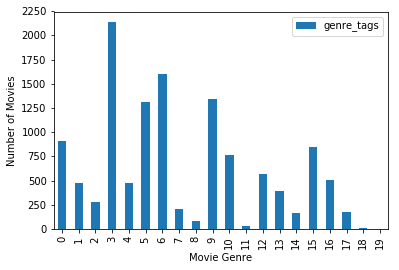

In [18]:
# genres ranges from 1 to 20
# each bar represents a genre
#ndf = ndf.reset_index(drop=True)
ndf = ndf.reset_index(drop=True)
ndf.plot.bar()
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
f2 = plt.gcf()

0 = adventure,
1 = fantasy,
2 = animation,
3 = drama,
4 = horror,
5 = action,
6 = comedy,
7 = history,
8 = western,
9 = thriller,
10 = crime,
11 = documentary,
12 = science fiction,
13 = mystery,
14 = music,
15 = romance,
16 = family,
17 = war,
18 = foreign,
19 = tv movie

### We can also see that significantly more movies have been released in the past decades and our data stops at 2017, which matches the description of the dataset from the website.

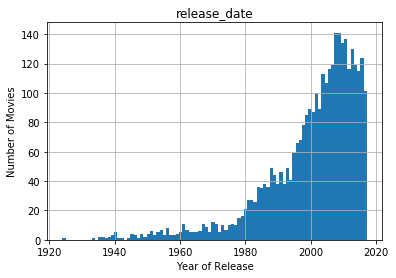

In [19]:
# release_date ranges from 1924 to 2017
# each bar represents a range of 1 Year
df['release_date'] = df['release_date'].astype(int)
df['release_date'] /= 10000
df.hist(column='release_date', bins=94)
f3 = plt.gcf()
# plt.xlabel('Each bar = 1 Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
df['release_date'] *= 10000

### Below, the plots of revenue and budget show that they are highly right-skewed values and need to be log transformed to conform to a more normal distribution and be more useful later in our analysis.

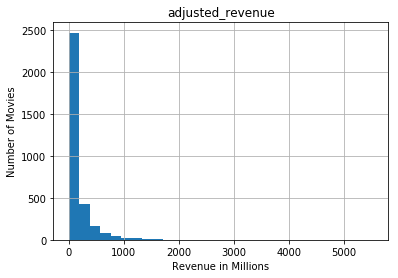

In [20]:
# revenue ranges from 1Million to 2.8Billion
# each bar represents a range of 100Million
df['adjusted_revenue'] /= 1000000
df.hist(column='adjusted_revenue', bins=29)
f4 = plt.gcf()
plt.xlabel('Revenue in Millions')
plt.ylabel('Number of Movies')
df['adjusted_revenue'] *= 1000000

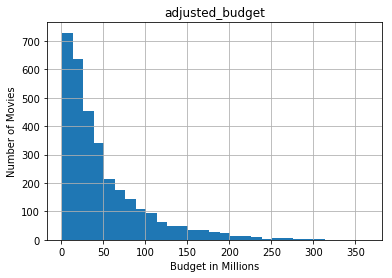

In [21]:
# each bar represents a range of 100Million
df['adjusted_budget'] /= 1000000
df.hist(column='adjusted_budget', bins=29)
f42 = plt.gcf()
plt.xlabel('Budget in Millions')
plt.ylabel('Number of Movies')
df['adjusted_budget'] *= 1000000

In [22]:
# need to log transform budget and revenue because they're skewed
df["budget10"] = np.log10(df["adjusted_budget"])
df["revenue10"] = np.log10(df["adjusted_revenue"])

### After log transforming both revenue and budget, we can see below that they now fit into normal distributions.

Text(0, 0.5, 'Number of Movies')

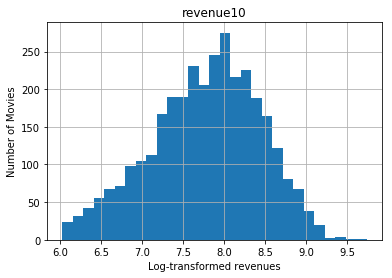

In [23]:
# revenue ranges from 1Million to 2.8Billion
df.hist(column='revenue10', bins=29)
f43 = plt.gcf()
plt.xlabel('Log-transformed revenues')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Number of Movies')

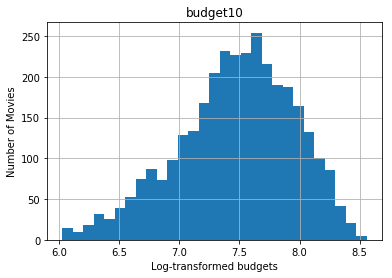

In [24]:
# each bar represents a range of 100Million
df.hist(column='budget10', bins=29)
f44 = plt.gcf()
plt.xlabel('Log-transformed budgets')
plt.ylabel('Number of Movies')

### In the graph below, we can see that the most common runtime in our dataset is around 100 minutes, or approximately just under two hours.

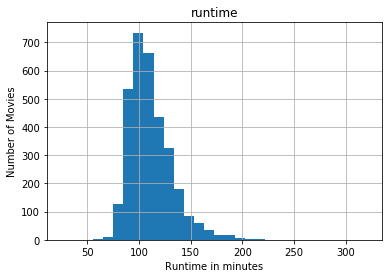

In [25]:
# runtime ranges from 26Min to 320Min
# each bar represents a range of 10Min
df['runtime'] = df['runtime'].astype(int)
df.hist(column='runtime', bins=30)
plt.xlabel('Runtime in minutes')
plt.ylabel('Number of Movies')
f5 = plt.gcf()

### The vote averages of all movies displays a relatively normal distribution on the 1-100 rating scale centered at approximately 70. It is interesting to note that there appear to be no movies that have vote averages of 90 or above.

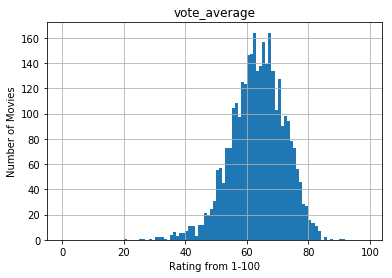

In [26]:
# vote ranges from 1 to 100
# each bar represents a range of 1
df['vote_average'] *= 10
df['vote_average'] = df['vote_average'].astype(int)
df.hist(column='vote_average', bins=range(99+1))
f7 = plt.gcf()
plt.xlabel('Rating from 1-100')
plt.ylabel('Number of Movies')
df['vote_average'] = df['vote_average'].astype(float)
df['vote_average'] /= 10

### We can see that the ranges of movie budgets and revenues have both significantly increased over time, likely due to the higher production rate in recent years.

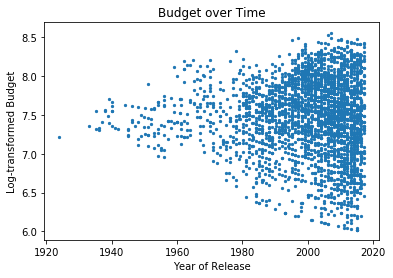

In [27]:
# budget, genres, revenue, runtime, vote_average over release_date
# Relationship of budget over time
df['release_date'] /= 10000
plt.scatter(df['release_date'], df['budget10'], s=5)
budget_plot = plt.gcf()
plt.xlabel('Year of Release')
plt.ylabel('Log-transformed Budget')
plt.title('Budget over Time')
df['release_date'] *= 10000

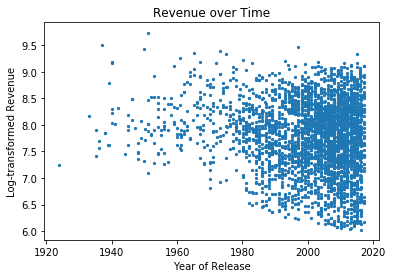

In [28]:
# Relationship of revenue over time
df['release_date'] /= 10000
plt.scatter(df['release_date'], df['revenue10'], s=5)
revenue_plot = plt.gcf()
plt.xlabel('Year of Release')
plt.ylabel('Log-transformed Revenue')
plt.title('Revenue over Time')
df['release_date'] *= 10000

### Runtime shows no significant changes over time.

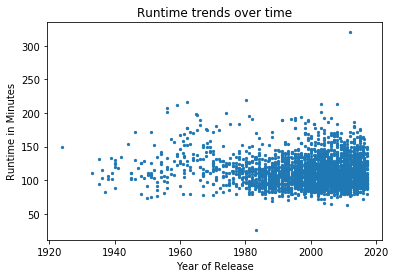

In [29]:
# Relationship of runtime over time
df['release_date'] /= 10000
plt.scatter(df['release_date'], df['runtime'], s=5)
budget_plot = plt.gcf()
plt.xlabel('Year of Release')
plt.ylabel('Runtime in Minutes')
plt.title('Runtime trends over time')
df['release_date'] *= 10000

### Similar to revenue and budget, the range of vote averages generally increases over time but there is no indication that newer movies are more highly rated.

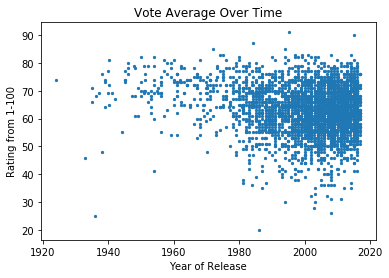

In [30]:
# Relationship of vote average over time
df['release_date'] /= 10000
df['vote_average'] *= 10
plt.scatter(df['release_date'], df['vote_average'], s=5)
budget_plot = plt.gcf()
plt.xlabel('Year of Release')
plt.ylabel('Rating from 1-100')
plt.title('Vote Average Over Time')
df['release_date'] *= 10000
df['vote_average'] /= 10

### Movie budgets and revenues are positively correlated as we can see below.

Text(0, 0.5, 'Revenue in Millions')

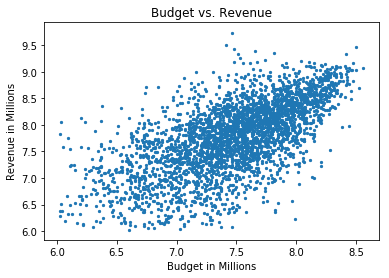

In [31]:
# Relationship of budget to revenue
plt.title('Budget vs. Revenue')
# rev = df['adjusted_revenue']/1000000
# bud = df['adjusted_budget']/1000000
plt.scatter(df['budget10'], df['revenue10'], s=5)
plt.xlabel('Budget in Millions')
plt.ylabel('Revenue in Millions')

### There seems to be a wide range of revenues across movies with similar runtimes.

Text(0, 0.5, 'Revenue in Millions')

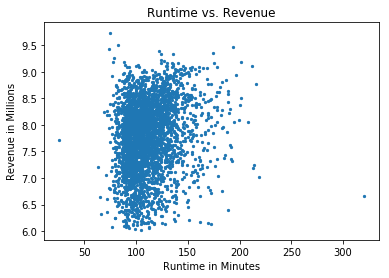

In [32]:
# Relationship of runtime to revenue
plt.title('Runtime vs. Revenue')
# rev = df['adjusted_revenue']/1000000
# bud = df['adjusted_budget']/1000000
plt.scatter(df['runtime'], df['revenue10'], s=5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Revenue in Millions')

### The two graphs below show the distribution of revenues and ratings, respectively, for each genre in our dataset.

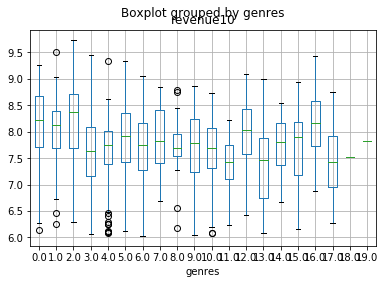

In [33]:
# Relationship of genre to revenue
gen_rev = df.boxplot(column=['revenue10'], by='genres')

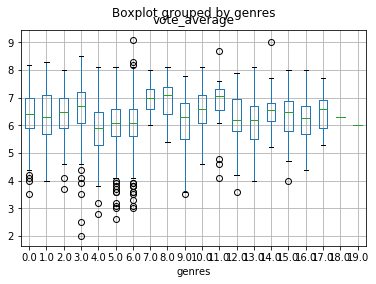

In [34]:
# Relationship of genre to vote average
gen_bud = df.boxplot(column=['vote_average'], by= 'genres')

### There are no a strong positive correlations between budget and rating, and runtime and rating of movies shown in the two graphs below.

Text(0, 0.5, 'Vote Average')

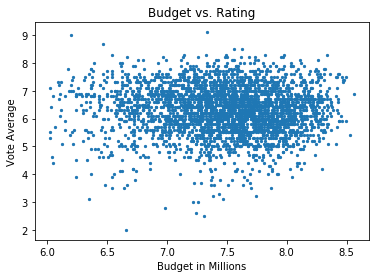

In [35]:
# Relationship between budget and rating
plt.title('Budget vs. Rating')
plt.scatter(df['budget10'], df['vote_average'], s=5)
plt.xlabel('Budget in Millions')
plt.ylabel('Vote Average')

Text(0, 0.5, 'Vote Average')

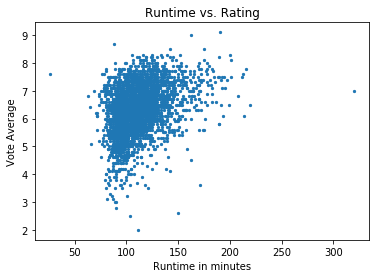

In [36]:
# Relationship between budget and rating
plt.title('Runtime vs. Rating')
plt.scatter(df['runtime'], df['vote_average'], s=5)
plt.xlabel('Runtime in minutes')
plt.ylabel('Vote Average')


### There appears to be a slight positive correlation between rating and revenue of movies.

Text(0, 0.5, 'Vote Average')

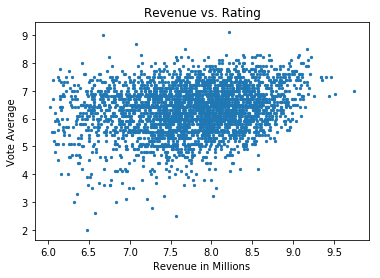

In [37]:
#Relationship between revenue and rating
plt.title('Revenue vs. Rating')
rev = df['adjusted_revenue']/1000000
plt.scatter(df['revenue10'], df['vote_average'], s=5)
plt.xlabel('Revenue in Millions')
plt.ylabel('Vote Average')

### The range of movie revenues has significantly increased over time.

Text(0.5, 1.0, 'Year vs. Revenue')

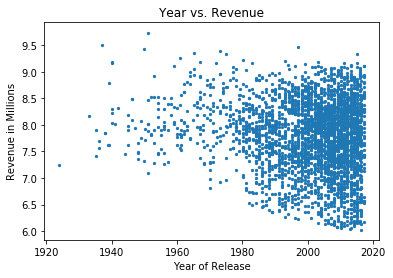

In [38]:
# Relationship between year of release and revenue

year = df['release_date'].astype(int)
year /= 10000
# rev = df['adjusted_revenue']/1000000
plt.scatter(year, df['revenue10'], s=5)
plt.xlabel('Year of Release')
plt.ylabel('Revenue in Millions')
plt.title('Year vs. Revenue')

### The range of movie ratings has significantly increased over time.

Text(0.5, 1.0, 'Year vs. Rating')

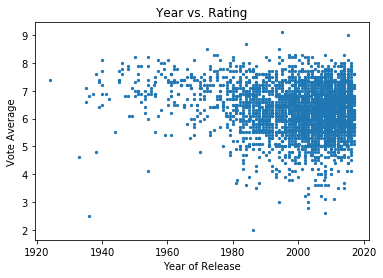

In [39]:
# Vote trend over time

year = df['release_date'].astype(int)
year /= 10000
plt.scatter(year, df['vote_average'], s=5)
plt.xlabel('Year of Release')
plt.ylabel('Vote Average')
plt.title('Year vs. Rating')

In [40]:
df['genres'] = df['genres'].astype(object)

In [41]:
outcome, predictors = patsy.dmatrices('vote_average ~ budget', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.691
Date:                Fri, 07 Jun 2019   Prob (F-statistic):              0.194
Time:                        16:13:50   Log-Likelihood:                -4141.4
No. Observations:                3241   AIC:                             8287.
Df Residuals:                    3239   BIC:                             8299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3212      0.020    314.604      0.0

### Based on the R-squared value, there is a 0.1% correlation between vote average and the budget of the movie. 

In [42]:
outcome, predictors = patsy.dmatrices('vote_average ~ revenue', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           3.95e-25
Time:                        16:13:50   Log-Likelihood:                -4088.5
No. Observations:                3241   AIC:                             8181.
Df Residuals:                    3239   BIC:                             8193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2074      0.018    351.921      0.0

### Based on the R-squared value, there is a 3.3% correlation between vote average and the revenue of the movie. 

In [43]:
outcome, predictors = patsy.dmatrices('vote_average ~ runtime', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     492.7
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          9.80e-102
Time:                        16:13:50   Log-Likelihood:                -3912.7
No. Observations:                3241   AIC:                             7829.
Df Residuals:                    3239   BIC:                             7842.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6485      0.076     61.219      0.0

### Based on the R-squared value, there is a 13.2% correlation between vote average and the runtime of the movie. 

In [44]:
outcome, predictors = patsy.dmatrices('revenue ~ budget', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     3635.
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:13:50   Log-Likelihood:                -64809.
No. Observations:                3241   AIC:                         1.296e+05
Df Residuals:                    3239   BIC:                         1.296e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.032e+06   2.71e+06     -0.381      0.7

### Based on the R-squared value, there is a 52.9% correlation between revenue and budget. 

In [45]:
outcome, predictors = patsy.dmatrices('revenue ~ runtime', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     88.89
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           7.68e-21
Time:                        16:13:50   Log-Likelihood:                -65984.
No. Observations:                3241   AIC:                         1.320e+05
Df Residuals:                    3239   BIC:                         1.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.097e+07   1.58e+07     -2.597      0.0

### Based on the R-squared value, there is a 2.7% correlation between revenue and the runtime of the movie. 

In [46]:
outcome, predictors = patsy.dmatrices('vote_average ~ genres', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     15.26
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           5.25e-48
Time:                        16:13:50   Log-Likelihood:                -4002.5
No. Observations:                3241   AIC:                             8045.
Df Residuals:                    3221   BIC:                             8167.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.3900      0.050    128.

### Based on the R-squared value, there is an 8.3% correlation between vote average and the genre of the movie. 

In [47]:
outcome, predictors = patsy.dmatrices('revenue ~ genres', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.54
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           3.03e-70
Time:                        16:13:51   Log-Likelihood:                -65834.
No. Observations:                3241   AIC:                         1.317e+05
Df Residuals:                    3221   BIC:                         1.318e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.151e+08   9.61e+06     22.

### Based on the R-squared value, there is a 11.3% correlation between revenue and genres of the movie. 

In [48]:
outcome, predictors = patsy.dmatrices('vote_average ~ runtime + adjusted_budget + genres', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     35.25
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          6.99e-128
Time:                        16:13:51   Log-Likelihood:                -3806.8
No. Observations:                3241   AIC:                             7658.
Df Residuals:                    3219   BIC:                             7791.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.7983      0.095     

### Based on the R-squared value, there is a 18.7% correlation between vote average and runtime, adjusted budget, and genres combined.

In [49]:
outcome, predictors = patsy.dmatrices('adjusted_revenue ~ runtime + adjusted_budget + genres', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       adjusted_revenue   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     68.27
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.23e-238
Time:                        16:13:51   Log-Likelihood:                -66889.
No. Observations:                3241   AIC:                         1.338e+05
Df Residuals:                    3219   BIC:                         1.340e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -5.21e+07   2.69e+07     

### Based on the R-squared value, there is a 30.8% correlation between adjusted revenue and runtime, adjusted budget, and genres combined.

### Here we will prepare our dataset to be used in sklearn by dropping unused columns, only including those to be used in our analysis.

### Using pandas.get_dummies, we will one-hot-encode the 'genres' column as this is how we choose to deal with the categorical variable

In [50]:
# Here we will prepare our dataset to be used in sklearn by dropping unused columns, only including those to be used
# in our analysis
df1 = df_final.drop(columns=['release_date', 'revenue', 'budget', 'title'])

# Using pandas.get_dummies, we will one-hot-encode the 'genres' column as this is how we choose to deal with the 
# categorical variable
df2 = pd.get_dummies(df1, columns=["genres"])
df2.head()

,runtime,vote_average,adjusted_revenue,adjusted_budget,genres_0.0,genres_1.0,genres_2.0,genres_3.0,genres_4.0,genres_5.0,...,genres_10.0,genres_11.0,genres_12.0,genres_13.0,genres_14.0,genres_15.0,genres_16.0,genres_17.0,genres_18.0,genres_19.0
0,81.0,7.7,6.154989e+08,4.943051e+07,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104.0,6.9,4.330068e+08,1.070994e+08,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127.0,6.1,1.342074e+08,2.636294e+07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,170.0,7.7,3.088366e+08,9.886102e+07,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,106.0,5.5,1.060287e+08,5.766893e+07,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Using sklearn train_test_split, we will split our data into 80/20 split. 80% of our data will be used for training and 20% will be used to test our regression on revenue

In [51]:
# Using sklearn train_test_split, we will split our data into 80/20 split. 80% of our data will be used for training
# and 20% will be used to test our regression on revenue
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['adjusted_revenue']), \
                                                     df2.adjusted_revenue, test_size=0.20, random_state=42)
X_test.head()

,runtime,vote_average,adjusted_budget,genres_0.0,genres_1.0,genres_2.0,genres_3.0,genres_4.0,genres_5.0,genres_6.0,...,genres_10.0,genres_11.0,genres_12.0,genres_13.0,genres_14.0,genres_15.0,genres_16.0,genres_17.0,genres_18.0,genres_19.0
2069,116.0,7.2,2.102571e+07,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1545,136.0,7.0,1.095171e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9522,132.0,7.7,3.987935e+07,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,97.0,6.7,2.260867e+07,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24407,81.0,6.1,2.969973e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### We can see with the third entry corresponding to the 'adjusted_budget' column has the most impact on revenue. The other variables have minimal effect on revenue

In [52]:
# Using sklearn, this is our linear regression model
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
# We can see with the third entry corresponding to the 'adjusted_budget' column has the most impact on revenue
# The other variables have minimal effect on revenue

array([  1.03977140e+06,   6.76900786e+07,   2.41042426e+00,
         5.07246981e+07,   4.62475514e+07,   1.48872702e+08,
        -2.97503143e+07,   5.16012968e+07,   6.45224702e+06,
         1.76613217e+07,  -8.38563735e+07,  -5.85217836e+07,
        -6.97246583e+05,  -4.43518212e+07,  -4.00300606e+07,
         4.72577930e+07,  -2.55387457e+07,  -4.13297971e+07,
         1.19076437e+07,   9.22205364e+07,  -1.29129100e+08,
        -8.24421127e+07,   6.27015651e+07])

In [53]:

# Here we can visualized our predicted values for our test dataframe
predicted_revenue = reg.predict(X_test)
reg.score(X_test, y_test)
# Our score of 0.4517 shows that only about 45% accurate

0.45898402514549297

### These are our predicted values for our test dataframe.

In [54]:

# Here we joined our 'predicted_revenue' and 'adjusted_revenue' to have a brief glimpse of how close to actual
# we were for individual movies revenues
X_test['predicted_revenue'] = predicted_revenue
X_test = X_test.join(y_test)
X_test[['predicted_revenue', 'adjusted_revenue']].head()

,predicted_revenue,adjusted_revenue
2069,1.008588e+08,7.569254e+07
1545,4.164945e+08,2.056694e+08
9522,2.113870e+08,2.881465e+08
2486,1.018778e+08,4.305765e+06
24407,1.474882e+08,1.067643e+08


In [55]:
# Using sklearn train_test_split, we will split our data into 80/20 split. 80% of our data will be used for training
# and 20% will be used to test our regression on revenue
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['vote_average']), \
                                                     df2.vote_average, test_size=0.05, random_state=42)
X_test.head()

,runtime,adjusted_revenue,adjusted_budget,genres_0.0,genres_1.0,genres_2.0,genres_3.0,genres_4.0,genres_5.0,genres_6.0,...,genres_10.0,genres_11.0,genres_12.0,genres_13.0,genres_14.0,genres_15.0,genres_16.0,genres_17.0,genres_18.0,genres_19.0
2069,116.0,7.569254e+07,2.102571e+07,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1545,136.0,2.056694e+08,1.095171e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9522,132.0,2.881465e+08,3.987935e+07,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,97.0,4.305765e+06,2.260867e+07,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24407,81.0,1.067643e+08,2.969973e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### We apply the same analysis to vote average below.

In [56]:
# Here we see that none of the variables we analyzed have a strong effect on vote_average
# 
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([  1.39411999e-02,   7.24325830e-10,  -3.25339813e-09,
        -1.03192601e-02,  -3.83159546e-02,   3.13082199e-01,
         1.20205340e-01,  -3.23417157e-01,  -2.65861996e-01,
        -1.74970288e-01,   1.27994636e-01,   3.95454170e-01,
        -2.00748393e-01,   1.89740917e-01,   5.64619676e-01,
        -1.05228558e-01,   3.51626560e-02,   2.05291254e-01,
        -3.80863284e-03,   4.53278560e-02,   1.31505353e-01,
        -8.93043658e-01,  -1.12670160e-01])

In [57]:
# Our resulting score of 0.2533 shows that only about 25% accurate
# This is a relatively low score and demonstrated our predictor model is not very strong 
predicted_vote = reg.predict(X_test)
reg.score(X_test, y_test)

0.25833385445818269

In [58]:
X_test['predicted_vote'] = predicted_vote
X_test = X_test.join(y_test)
X_test[['predicted_vote', 'vote_average']].head()

,predicted_vote,vote_average
2069,6.642591,7.2
1545,6.527603,7.0
9522,6.888662,7.7
2486,5.865248,6.7
24407,6.004522,6.1


# Data Analysis and Results

## Ethics and Privacy
Our data comes from Kaggle, which is a site that contains public data sets. Therefore we do have permission to use this data for academic purposes. We are not impeding anyone’s privacy by utilizing this data because it is public information about movies. However, we do not have much information about how this data set was acquired. There were 45,000 movies in the data set, which is actually relatively small. We do not know if these movies are representative of all movies in existence. In addition, many more movies are made today than were made in the mid 1900’s where our data set begins. This is a possible source of bias because we simply have more information about modern movies than older ones. In our data cleaning we had to drop some of the movies because they were missing information about the revenue or other crucial variables. This might have altered the data in a way that renders our conclusions less authentic. Another potential source of bias is that we do not know how the voting scores were calculated. Natural human biases could have led participants to vote a certain way that is not truly representative of the data. 

The main benefactor for our data analysis would be movie production companies. However, since we have limited variables that are not highly predictive, these companies would need to conduct further research to get a clear picture of the variables that truly predictive movie success. Certainly, there are movies missing from our data set. These missing movies might have impacted our conclusions in different ways that unfortunately, we cannot determine. Movie companies might use this data mischievously to circumvent the creative process in movie production and instead, focus only on factors that will contribute to the most profitable movie.

## Data Analysis
When beginning our project, we hoped to be able to predict the success of a movie based on its various factors. We worked through various categories and chose budget, runtime, and genre as our independent variables. For our outcome variables we originally wanted to create an "Overall success score" based on the combination of revenue and vote_average, but ultimately decided to just attempt to predict the revenue and vote_average independently of each other. By analyzing our data, we hope to be able to conclude whether or not our predictive model was accurate.

The primary objective of our analysis was to create a predictive model of a movie's revenue and vote average using multiple linear regression, but we also hoped to explore and delve into how some specific variables may have more effect on the outcome than others. After data cleaning, the analysis using the statsmodels and sklearn packages was relatively straight-foward with the only somewhat troubling step being the one-hot-encoding needed to use the categorical variable of "genres" in our regression. From there, we were able to retrieve the correlation coefficient of every variable. The one-hot-encoding meant that we could see whether or not a particular genre had more weight as well. 

Although there are differences of weight between the genres, the differences were relatively small and possibly could be random differences due to our relatively small dataset of <4000. However, ignoring possible confounding factors, our regression shows that the genres with the best revenue are under “adventure” and “fantasy”. These are relatively broad umbrella terms, but could be accounted for the fact that most blockbuster movies are those enjoyed by a wider range of audiences, and “adventure” and “fantasy” movies are often the ones to be very popular, although not necessarily critically acclaimed. For vote_average, genres with the most weight are family, documentary, and mystery in respective order. We can see here that genres which generate a lot of revenue does not necessarily receive a strong vote according to critics. 

## Conclusion and Discussion
Our project investigated the correlations between the success of movies and different factors like budget, genre, year of release, and runtime. However, we concluded that we had missing variables in the data, and as a result, the data wasn’t predictive of the success of movies. The data from our project suggests that budget is the only impactful variable, while the factors individually aren’t as impactful since the coefficients were not high enough to demonstrate a significant correlation. According to the R-Squared values we found in our linear regressions, runtime, adjusted budget, and genres combined are only correlated 30.8% with adjusted revenue. In addition, runtime, adjusted budget, and genres combined are only 18.7% correlated with voter average. This was very surprising to as, as we thought our data set possessed variables that would help us predict success of future movies. In reality, these variables have a relatively low impact on the success of a movie, which we have characterized by a high voter average.

We hypothesized at the beginning that budget, genre, year of release, and runtime would have a significant impact on the success of a movie. Since this was not the outcome we derived, it is possible that there are other variables that would have a greater impact. For example, perhaps having a well-known celebrity in the movie causes it to be more successful or that movies with main characters who are between age 15-25  fare better. Access to more in depth information about movies would allow for greater ability to make more accurate predictions in the future. A similar data analysis with more predictive variables could be used in the future to help movie production companies predict the success of their films and better understand the preferences of audiences on a large scale. 
